In [93]:
pip install sweetviz

In [94]:
pip install cuml

  Using cached cuml-0.6.1.post1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cuml
  Running setup.py clean for cuml
Failed to build cuml
ERROR: Could not build wheels for cuml, which is required to install pyproject.toml-based projects


In [95]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import sweetviz as sv


In [96]:
# Read the dataset into a pandas dataframe
df = pd.read_csv("/content/bank-additional-full.csv",delimiter=";")
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [97]:
# Understand the Dataset
df.shape

(41188, 21)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [99]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [100]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [101]:
#Generate a report to understand important features and correlations between those features
report = sv.analyze(df)
report.show_html("bank_marketting_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report bank_marketting_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [102]:
#Drop unecessary columns

df.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m'], axis=1, inplace=True)

In [103]:
df

,age,job,marital,education,default,housing,loan,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,5191.0,no
1,57,services,married,high.school,unknown,no,no,5191.0,no
2,37,services,married,high.school,no,yes,no,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,5191.0,no
4,56,services,married,high.school,no,no,yes,5191.0,no
...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,4963.6,no
41186,44,technician,married,professional.course,no,no,no,4963.6,yes


In [104]:
# Treat missing values and duplicates

df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
nr.employed    0
y              0
dtype: int64

In [105]:
df.drop_duplicates(inplace=True)
df

,age,job,marital,education,default,housing,loan,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,5191.0,no
1,57,services,married,high.school,unknown,no,no,5191.0,no
2,37,services,married,high.school,no,yes,no,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,5191.0,no
4,56,services,married,high.school,no,no,yes,5191.0,no
...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,4963.6,no
41186,44,technician,married,professional.course,no,no,no,4963.6,yes


In [106]:
df.reset_index(inplace=True, drop=True)
df

,age,job,marital,education,default,housing,loan,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,5191.0,no
1,57,services,married,high.school,unknown,no,no,5191.0,no
2,37,services,married,high.school,no,yes,no,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,5191.0,no
4,56,services,married,high.school,no,no,yes,5191.0,no
...,...,...,...,...,...,...,...,...,...
23633,73,retired,married,professional.course,no,yes,no,4963.6,yes
23634,46,blue-collar,married,professional.course,no,no,no,4963.6,no
23635,56,retired,married,university.degree,no,yes,no,4963.6,no
23636,44,technician,married,professional.course,no,no,no,4963.6,yes


In [107]:
# One-Hot Encoding

cat_df = df[['job', 'marital', 'education', 'default', 'housing', 'loan']]
num_df = df[['age','nr.employed','y']]

In [108]:
df_cat = pd.get_dummies(cat_df, drop_first=True)
df_cat

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
23634,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
23635,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
23636,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [109]:
df1 = pd.concat([df_cat,num_df],axis=1)
df1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,age,nr.employed,y
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,56,5191.0,no
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,57,5191.0,no
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,37,5191.0,no
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,40,5191.0,no
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,56,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,73,4963.6,yes
23634,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,46,4963.6,no
23635,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,56,4963.6,no
23636,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,44,4963.6,yes


In [110]:
le =  LabelEncoder()

In [111]:
df1['y'] = le.fit_transform(df1['y'])
df1


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,age,nr.employed,y
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,56,5191.0,0
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,57,5191.0,0
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,37,5191.0,0
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,40,5191.0,0
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,56,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,73,4963.6,1
23634,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,46,4963.6,0
23635,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,56,4963.6,0
23636,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,44,4963.6,1


In [112]:
df1.y.value_counts(), df1.shape

(y
 0    19658
 1     3980
 Name: count, dtype: int64,
 (23638, 30))

In [113]:
# Train Test Split

X = df1.drop(columns=['y'])
y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16546, 29), (7092, 29), (16546,), (7092,))

In [114]:
# Feature Scaling

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [115]:
# Model Training

random_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()
xgb = XGBClassifier()
knn = KNeighborsClassifier()


In [116]:
num_folds = 5

Cross_val = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

for classifier, name in zip([random_forest, grad_boost, xgb, knn],
                            ['Random Forest', 'Gradient Boosting', 'XGBoost', 'k-Nearest Neighbors']):
    cv_scores = cross_val_score(classifier, X, y, cv=Cross_val, scoring='accuracy')
    print(f"{name} - Cross-validation scores:", cv_scores)
    print(f"{name} - Mean accuracy:", cv_scores.mean())
    print(f"{name} - Standard deviation of accuracy:", cv_scores.std())
    print()

Random Forest - Cross-validation scores: [0.76374788 0.75253807 0.76332487 0.76010154 0.75417813]
Random Forest - Mean accuracy: 0.7587780998168351
Random Forest - Standard deviation of accuracy: 0.0046307912462515925

Gradient Boosting - Cross-validation scores: [0.83354484 0.82571912 0.82825719 0.83372118 0.83160567]
Gradient Boosting - Mean accuracy: 0.8305695992743563
Gradient Boosting - Standard deviation of accuracy: 0.003121932440226671

XGBoost - Cross-validation scores: [0.82466159 0.81662437 0.82360406 0.82695155 0.82123969]
XGBoost - Mean accuracy: 0.8226162517445772
XGBoost - Standard deviation of accuracy: 0.003514303994951351

k-Nearest Neighbors - Cross-validation scores: [0.80795262 0.80583756 0.80837563 0.81320076 0.80304633]
k-Nearest Neighbors - Mean accuracy: 0.807682582364263
k-Nearest Neighbors - Standard deviation of accuracy: 0.0033437248528774754



In [117]:
# Gradient Boost is the best option
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train_sc, y_train)

predictions = gradient_boost.predict(X_test_sc)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

report = classification_report(y_test, predictions)
print("Classification report:", report)


Accuracy: 0.8312182741116751
Classification report:               precision    recall  f1-score   support

           0       0.85      0.96      0.90      5893
           1       0.50      0.18      0.26      1199

    accuracy                           0.83      7092
   macro avg       0.68      0.57      0.58      7092
weighted avg       0.79      0.83      0.80      7092



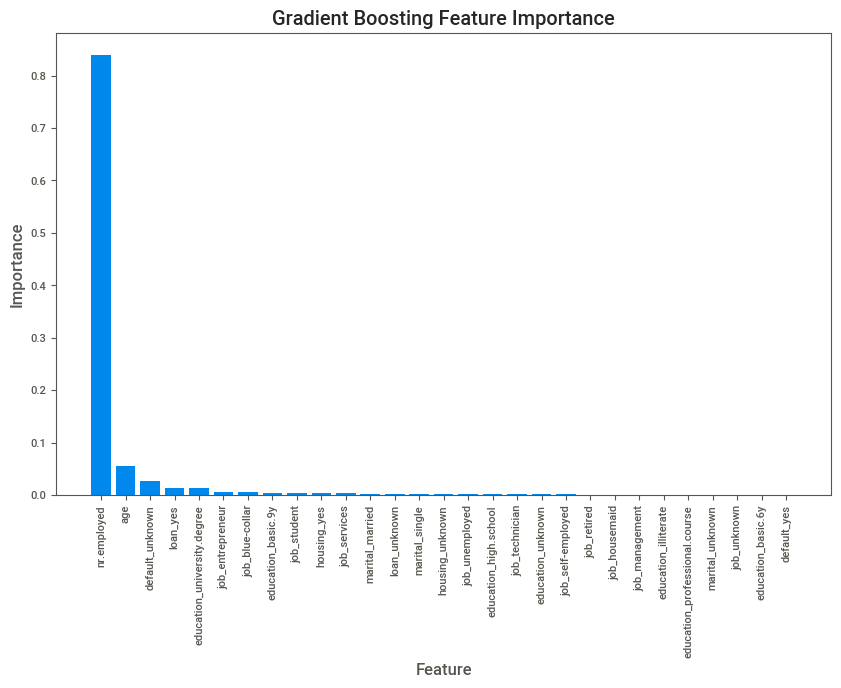

In [119]:
importances = gradient_boost.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_sc.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_sc.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Gradient Boosting Feature Importance')
plt.show()


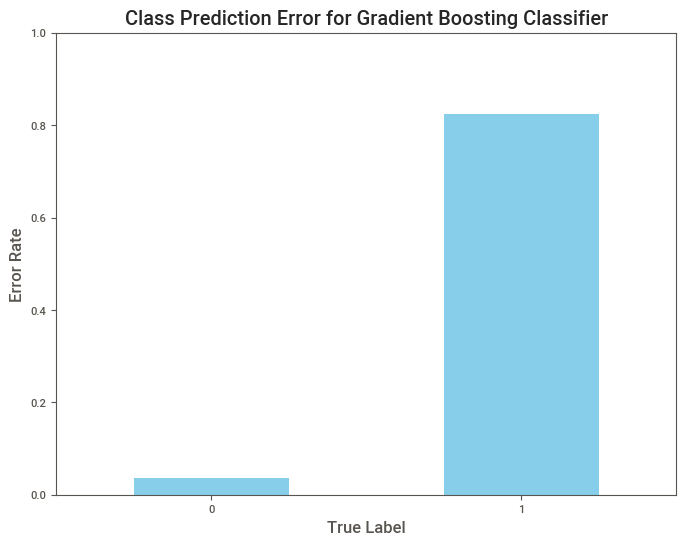

In [120]:
# Class prediction error

error_df = pd.DataFrame({'True': y_test, 'Predicted': predictions})
error_df['Error'] = error_df['True'] != error_df['Predicted']

error_rates = error_df.groupby('True')['Error'].mean()

plt.figure(figsize=(8, 6))
error_rates.plot(kind='bar', color='skyblue')
plt.xlabel('True Label')
plt.ylabel('Error Rate')
plt.title('Class Prediction Error for Gradient Boosting Classifier')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()
